In [1]:
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import numpy as np

df_cpi = pd.read_csv("cpi.csv") #pandas assumes us date format month first #nulls at end [ONLY]
df_ber = pd.read_csv("t10y.csv") #pandas assumes us date format month first #nulls in middle
df_ber['DATE'] = pd.to_datetime(df_ber['DATE'])



df_cpi['date'] = pd.to_datetime(df_cpi['date'])
df_cpi = df_cpi[df_cpi['date'].dt.day == 1]
df_cpi.index = np.arange(len(df_cpi))
df_cpi = df_cpi.dropna()
df_cpi.tail()

,date,CPI
131,2019-06-01,117.0359
132,2019-07-01,117.0592
133,2019-08-01,117.2548
134,2019-09-01,117.2488
135,2019-10-01,117.3407


In [2]:
CPI = df_cpi['CPI'].to_numpy()
#now setting so inflation appears in the following month
IRt = [0]
IRt_log = [0]
for _ in range(1,len(CPI)):
    IRt.append((CPI[_]-CPI[_-1])/CPI[_-1])
    IRt_log.append(np.log(CPI[_])-np.log([_-1]))
#IRt.append(float("NaN"))
#IRt_log.append(float("NaN"))
df_cpi['IRt']=IRt
df_cpi['IRt_log']=IRt

C:\Users\micha\AppData\Local\Temp/ipykernel_21560/3400565933.py:7: RuntimeWarning: divide by zero encountered in log
  IRt_log.append(np.log(CPI[_])-np.log([_-1]))


In [3]:
df_cpi.head().append(df_cpi.tail())

,date,CPI,IRt,IRt_log
0,2008-07-01,100.00000,0.000000,0.000000
1,2008-08-01,100.52510,0.005251,0.005251
2,2008-09-01,100.12380,-0.003992,-0.003992
3,2008-10-01,99.98538,-0.001382,-0.001382
4,2008-11-01,98.97539,-0.010101,-0.010101
131,2019-06-01,117.03590,0.002129,0.002129
132,2019-07-01,117.05920,0.000199,0.000199
133,2019-08-01,117.25480,0.001671,0.001671
134,2019-09-01,117.24880,-0.000051,-0.000051
135,2019-10-01,117.34070,0.000784,0.000784


In [4]:
#IRt is stored in the month it relates to. Therefore the final month has no Inflation (since the next months value is unknown)
#Dropping the final month to allow statstools to do its thing:
df_cpi = df_cpi.dropna()

Rates for Feb 2013 = 0.2957 and 0.8190
Rates for Mar 2013 = 0.8190 and 0.2614


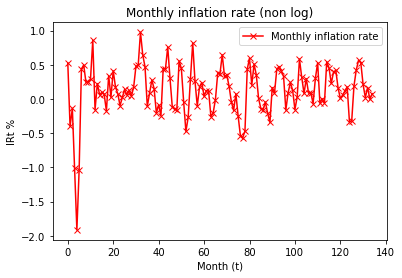

In [5]:
#Get monthly CPI as first day of each month
#from 8/1/2008
#to 10/1/2019
df_cpi['date'] = pd.to_datetime(df_cpi['date'])
df_cpi = df_cpi[df_cpi['date'].dt.day == 1]
df_cpi.index = np.arange(len(df_cpi))
df_cpi.head()
print(f"Rates for Feb 2013 = {df_cpi[df_cpi['date'] == '2013-02-01']['IRt'].to_numpy()[0]*100:.4f} and {df_cpi[df_cpi['date'] == '2013-03-01']['IRt_log'].to_numpy()[0]*100:.4f}")
print(f"Rates for Mar 2013 = {df_cpi[df_cpi['date'] == '2013-03-01']['IRt'].to_numpy()[0]*100:.4f} and {df_cpi[df_cpi['date'] == '2013-04-01']['IRt_log'].to_numpy()[0]*100:.4f}")
plt.title("Monthly inflation rate (non log)")
plt.xlabel("Month (t)")
plt.ylabel("IRt %")
IRt_pc = np.array(IRt)*100.0
plt.plot(np.arange(len(IRt_pc[1:])),IRt_pc[1:],'r-x',label='Monthly inflation rate')
plt.legend()
plt.show()


* No obvious trend
* possible seasonality - ACF plot

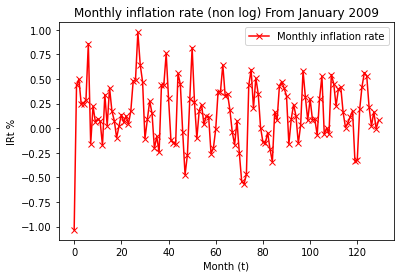

In [6]:
#Plot removing anomalously low value at 2008-11 (-1.9%)

plt.title("Monthly inflation rate (non log) From January 2009")
plt.xlabel("Month (t)")
plt.ylabel("IRt %")


plt.plot(np.arange(len(IRt_pc[6:])),IRt_pc[6:],'r-x',label='Monthly inflation rate')
plt.legend()
plt.show()

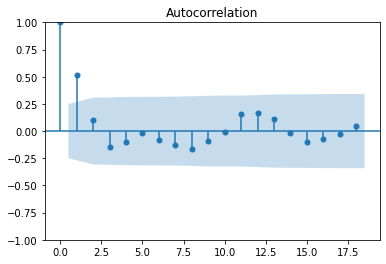

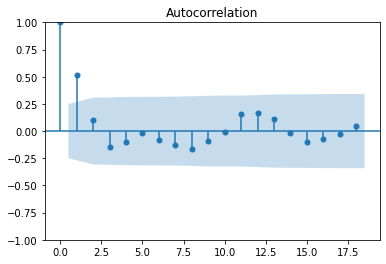

In [7]:
sm.graphics.tsa.plot_acf(df_cpi[df_cpi['date'] < '2013-09-01']['IRt'])

* Auto-correlation does not fall to zero - there is evidence of some periodicity thereafter so not MA

Is there evidence of seasonality? - plotting average by month


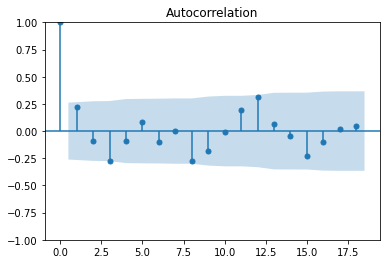

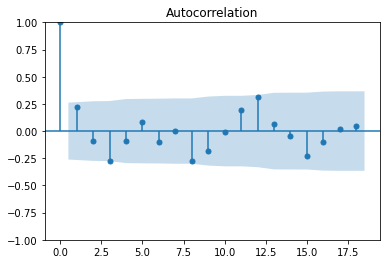

In [8]:
sm.graphics.tsa.plot_acf(df_cpi[df_cpi['date'] < '2013-09-01']['IRt'][6:])

C:\Users\micha\anaconda3\envs\PandasNumpyMathplotlib\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


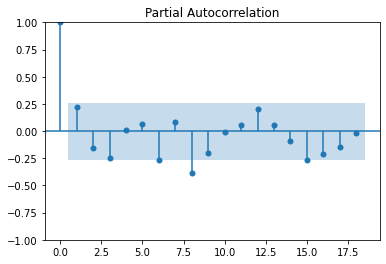

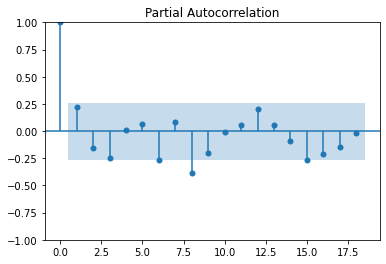

In [9]:
sm.graphics.tsa.plot_pacf(df_cpi[df_cpi['date'] < '2013-09-01']['IRt'][6:])

In [10]:
#Plot each years rates:


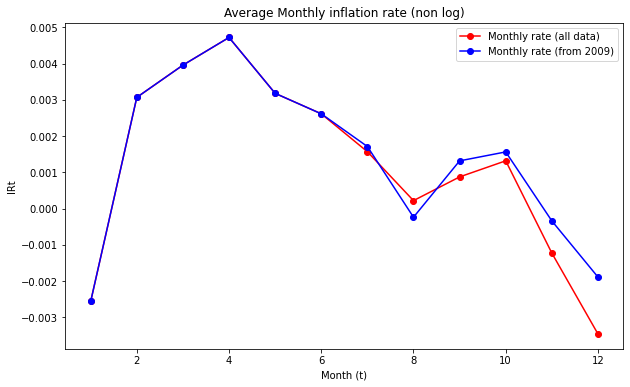

In [11]:
df_cpi['month']=df_cpi['date'].dt.month
df_cpi_from09 = df_cpi[6:]
month_average = df_cpi.groupby(['month']).mean()["IRt"].to_numpy()
month_average_from09 = df_cpi_from09.groupby(['month']).mean()["IRt"].to_numpy()

plt.figure(figsize=(10,6))
plt.title("Average Monthly inflation rate (non log)")
plt.xlabel("Month (t)")
plt.ylabel("IRt")
plt.plot(np.arange(1,len(month_average)+1),month_average,'ro-',label='Monthly rate (all data)')
plt.plot(np.arange(1,len(month_average_from09)+1),month_average_from09,'bo-',label='Monthly rate (from 2009)')
plt.legend()
plt.show()

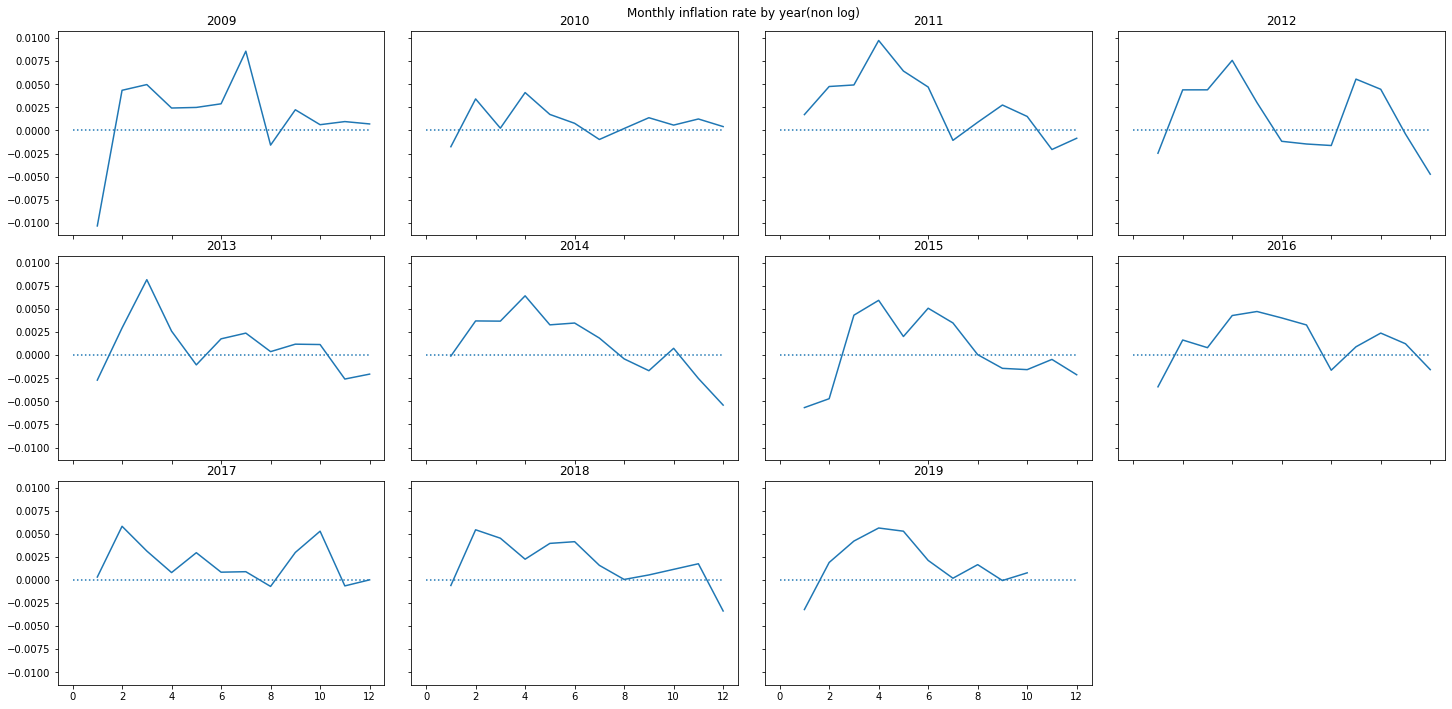

In [12]:

fig,axs = plt.subplots(3,4,sharex = True,sharey=True,figsize=(20,10))

fig.suptitle("Monthly inflation rate by year(non log)")
fig.tight_layout()

plt.xlabel("Month (t)")
plt.ylabel("IRt")

#print(df_cpi_from09.iloc[0,:])
#,'bo-',label='Monthly rate (from 2009)'
for year_start in range(0,len(df_cpi_from09),12):
    year = year_start/12
    ax_x = int(year//4)
    ax_y = int(year%4)
    rates = df_cpi_from09.iloc[year_start:year_start+12,2]
    axs[ax_x,ax_y].set_title(f'{int(2009 + year)}')
    #axs[ax_x,ax_y].grid(axis='y')
    axs[ax_x,ax_y].hlines(0,0,12,linestyles='dotted')
    axs[ax_x,ax_y].plot(np.arange(1,len(rates)+1),rates)

#plt.legend()
fig.delaxes(axs[2,3])
plt.show()

* This is monthly data so need to consider whether seasonality is an issue. 
* Plot of average shows that inflation rate is higher at the start of the year and becomes negative towards the end of the year. 
    * This is true whether or not the anomalously low values in 2008 are removed. 
    * All but one of the yearly plots show this as well
* Since this is US data for consumer goods and services Black Friday, Christmas and New Year sales provide a plausible explanation:
    * Monthly inflation rates become negative as price cutting commences and then become positive as the January sales end and retailers act to increase there margins
### CONCLUSION: remove seasonality prior to looking for stationarity

C:\Users\micha\AppData\Local\Temp/ipykernel_21560/3591281787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi_from09['IRT_corrected'] = df_cpi_from09.iloc[:,2] - month_average_from09[df_cpi_from09.iloc[:,4]-1]
C:\Users\micha\AppData\Local\Temp/ipykernel_21560/3591281787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi_from09['seasonal_correction'] = month_average_from09[df_cpi_from09.iloc[:,4]-1]


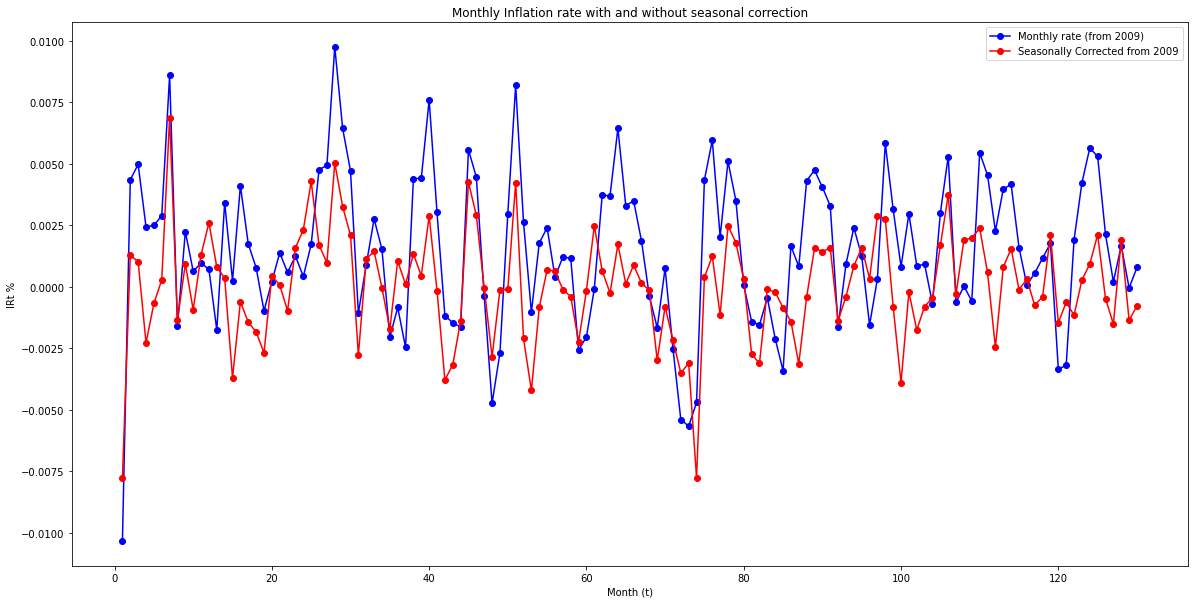

In [13]:
#month_average_from09

df_cpi_from09['IRT_corrected'] = df_cpi_from09.iloc[:,2] - month_average_from09[df_cpi_from09.iloc[:,4]-1]
df_cpi_from09['seasonal_correction'] = month_average_from09[df_cpi_from09.iloc[:,4]-1]
#TODO: use subplots of the 2 and monthly average as check of logic above
#TODO: then use these for stationarity and period calculations

plt.figure(figsize=(20,10))
plt.title("Monthly Inflation rate with and without seasonal correction")
plt.xlabel("Month (t)")
plt.ylabel("IRt %")
plt.plot(np.arange(1,len(df_cpi_from09)+1),df_cpi_from09['IRt'],'bo-',label='Monthly rate (from 2009)')
plt.plot(np.arange(1,len(df_cpi_from09)+1),df_cpi_from09['IRT_corrected'],'ro-',label='Seasonally Corrected from 2009')
plt.legend()
plt.show()


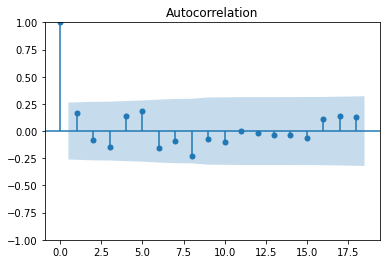

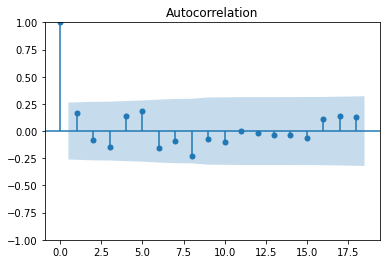

In [14]:
sm.graphics.tsa.plot_acf(df_cpi_from09[df_cpi_from09['date'] < '2013-09-01']['IRT_corrected'])

C:\Users\micha\anaconda3\envs\PandasNumpyMathplotlib\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


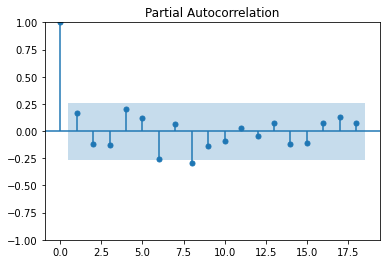

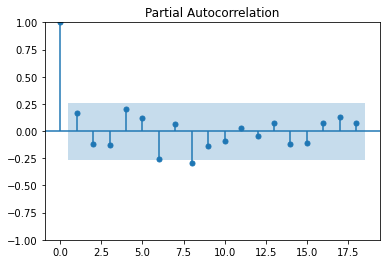

In [15]:
sm.graphics.tsa.plot_pacf(df_cpi_from09[df_cpi_from09['date'] < '2013-09-01']['IRT_corrected'])

C:\Users\micha\anaconda3\envs\PandasNumpyMathplotlib\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


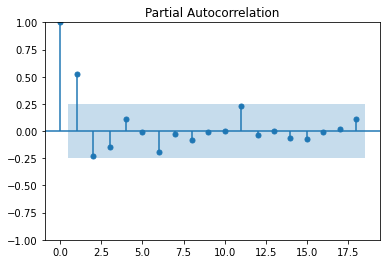

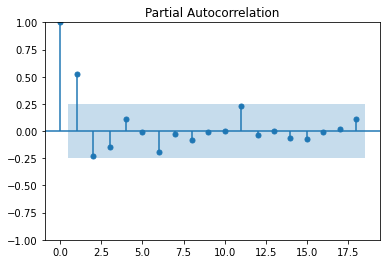

In [16]:
sm.graphics.tsa.plot_pacf(df_cpi[df_cpi['date'] < '2013-09-01']['IRt'])

* PACF provides evidence for AR(1) and h=11 is close to being significant

In [17]:
#No significant seasonality so check for Stationarity: 
#TODO: need to only use the training data!!!!!

print(f"Stationarity (all data)")
stationarity_BIC = sm.tsa.stattools.adfuller(df_cpi[df_cpi['date'] < '2013-09-01']['IRt'],autolag='BIC')
print(f"BIC test stat: {stationarity_BIC[0]} BIC P-value: {stationarity_BIC[1]} Lag Used: {stationarity_BIC[2]}")
stationarity_AIC = sm.tsa.stattools.adfuller(df_cpi[df_cpi['date'] < '2013-09-01']['IRt'],autolag='AIC')
print(f"All data: AIC test stat: {stationarity_AIC[0]} AIC P-value: {stationarity_AIC[1]} Lag Used: {stationarity_AIC[2]}")

print(f"\nStationarity 2009 onwards:")
stationarity_BIC = sm.tsa.stattools.adfuller(df_cpi[df_cpi['date'] < '2013-09-01']['IRt'][6:],autolag='BIC')
print(f"from 2009: BIC test stat: {stationarity_BIC[0]} BIC P-value: {stationarity_BIC[1]} Lag Used: {stationarity_BIC[2]}")
stationarity_AIC = sm.tsa.stattools.adfuller(df_cpi[df_cpi['date'] < '2013-09-01']['IRt'][6:],autolag='AIC')
print(f"From 2009: AIC test stat: {stationarity_AIC[0]} AIC P-value: {stationarity_AIC[1]} Lag Used: {stationarity_AIC[2]}")

print(f"\nStationarity seasonally-corrected 2009 onwards:")
stationarity_BIC = sm.tsa.stattools.adfuller(df_cpi_from09[df_cpi_from09['date'] < '2013-09-01']['IRT_corrected'],autolag='BIC')
print(f"from 2009: BIC test stat: {stationarity_BIC[0]} BIC P-value: {stationarity_BIC[1]} Lag Used: {stationarity_BIC[2]}")
stationarity_AIC = sm.tsa.stattools.adfuller(df_cpi_from09[df_cpi_from09['date'] < '2013-09-01']['IRT_corrected'],autolag='AIC')
print(f"From 2009: AIC test stat: {stationarity_AIC[0]} AIC P-value: {stationarity_AIC[1]} Lag Used: {stationarity_AIC[2]}")




Stationarity (all data)
BIC test stat: -4.362421780403649 BIC P-value: 0.0003457395889908484 Lag Used: 0
All data: AIC test stat: -2.1627380598746604 AIC P-value: 0.22004616890678608 Lag Used: 10

Stationarity 2009 onwards:
from 2009: BIC test stat: -5.306762592124548 BIC P-value: 5.301773061171164e-06 Lag Used: 2
From 2009: AIC test stat: -4.003320599773079 AIC P-value: 0.0013932230811928123 Lag Used: 5

Stationarity seasonally-corrected 2009 onwards:
from 2009: BIC test stat: -6.832890242010324 BIC P-value: 1.8740485313774063e-09 Lag Used: 0
From 2009: AIC test stat: -3.378495526156445 AIC P-value: 0.011714170365662862 Lag Used: 3


SO for all data: 
Both BIC and AIC pass stationarity test 

For 2009 onwards (removing anomalously low values from 2008):
Both BIC and AIC pass stationarity test 

Following seasonal adjustment:
BIC passes
AIC passes at 0.05

Fitting on all training data:
aAIC: -474.4970526978817 BIC:-466.54111651162464
const     0.001418
IRt.L1    0.395256
IRt.L2   -0.181298
dtype: float64
AR model Lags: [1, 2] 
 TRAINING RMSE: 0.0027766674316624836


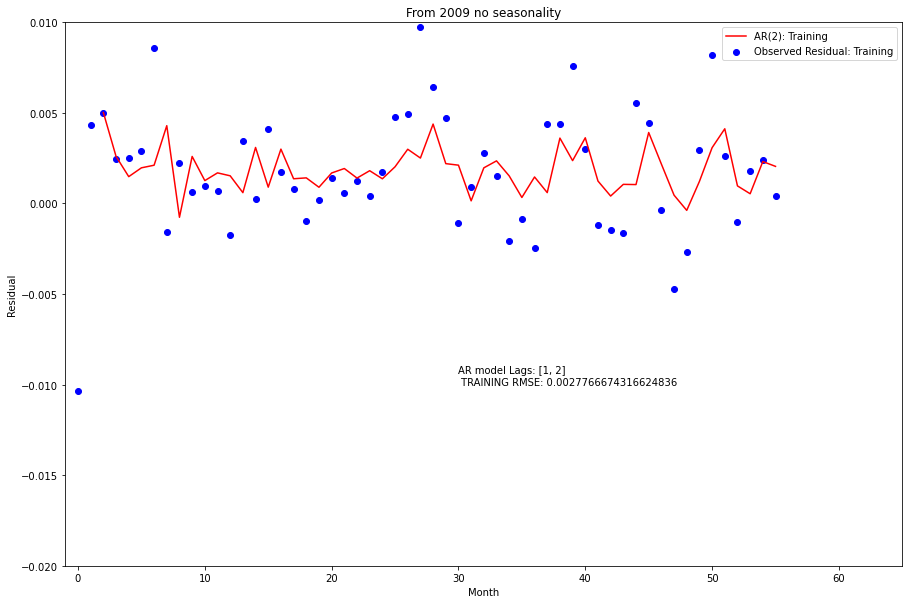

In [18]:
#TODO: model AR(P) with different lags (all training)
#NB sm.tsa.AutoReg lags=[] is an array of the lags to fit to on his run
def ARp_train_metric(data,train_start,train_end,lag_array,title,model_legend, plot=True, print_params = True):
    """
    data: actual dataset for test/train
    train_start: Start of training data
    train_end: end of training data
    lag: Array of lag's to include in training
    """
    from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

    print("Fitting on all training data:")
    ar_model = None
    ar_model = sm.tsa.AutoReg(data[train_start:train_end],lags=lag_array,old_names = False).fit()
    print(f"aAIC: {ar_model.aic} BIC:{ar_model.bic}")
    if print_params:
        print(ar_model.params)
    #ar_train_predict will be shorter than full data array as first values don't have previous actual in order to calculate lag
    prediction_offset = max(lag_array)
    metric_start = train_start + prediction_offset

    ar_train_predict = ar_model.fittedvalues # this is a Series object
    #print(ar_model.summary())

    #generate 

    #Plot and calculate RMSE
    box_text = f"AR model Lags: {lag_array} \n TRAINING RMSE: {mean_squared_error(data[metric_start:train_end],ar_train_predict,squared=False)}"
    print(box_text)
    if plot:
        #plot_actual_predicted(data[metric_start:train_end],ar_train_predict,prediction_offset,title,model_text=model_legend, box_text = box_text) #pre 
        plot_actual_predicted(data[train_start:train_end],ar_train_predict,prediction_offset,title,model_text=model_legend, box_text = box_text)


def plot_actual_predicted(y_train,y_train_predict,prediction_offset,title,model_text="model",box_text=""):
    #TODO: add in test sets

    fig = plt.figure(figsize=(15,10))
    plt.axis((-1, 65, -0.020, 0.010))

    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Residual")
    #plt.plot(np.arange(len(cpi_train)),cpi_train,'r-',label='Actual')
    plt.scatter(np.arange(len(y_train)),y_train,c='b',label='Observed Residual: Training')
    plt.plot(np.arange(prediction_offset,len(y_train_predict)+prediction_offset),y_train_predict,c='r',label=f"{model_text}: Training")
    plt.legend()
    if box_text !="":
        plt.text(30,-0.01,box_text)
    #TODO: add in test sets
    plt.show()


#Plot from 2009 onwards (avoiding the anomalies)
#data = df_cpi_from09[['IRt']]
#now as iloc
df_data = df_cpi_from09.loc[:,['date','IRt','IRT_corrected']].reset_index(drop=True)
#df_data.reset_index(drop=True)
data = df_data['IRt']
train_start = 0
train_end = len(df_data[df_data['date'] < '2013-09-01'])
legend='AR(2)'
title = "From 2009 no seasonality"
ARp_train_metric(data,train_start,train_end,lag_array=[1,2],title=title,model_legend = legend)

In [19]:
def fit_arp(model,data):
    """
    model: model from sm.tsa.autoreg 
    ASSUMPTION:
    * all lag terms from 1 to p are being fit
    
    data: data to be fit
    Returns: np array of fitted values
    """
    lag_terms = len(model.params)-1
    AR_fit = np.zeros(len(data)) 
    for time in range(lag_terms,len(data)):
        fit=0
        for lag in range(1,lag_terms+1):
            fit += model.params[lag]*data[time-lag]
        AR_fit[time] = fit + model.params[0]
    return AR_fit




def get_train_test_seasonal(ar_model,df,train_start,train_end,lag_array,print_params=False):
    """
    model: fitted arp_model
    df: ASSUMPTIONS:
    * model fits IRT_corrected 
    * irt_corrected + seasonality = IRt
    train_start: start of training data
    train_end: end of training data ASSUMPTION: 
    * next index onwards is test data

    returns: array of fitted values
    """
    irt_data = df['IRT_corrected'].to_numpy()
    seasonal_correction = df['seasonal_correction'].to_numpy()

  
    if print_params:
        print(ar_model.params)
    #ar_train_predict will be shorter than full data array as first values don't have previous actual in order to calculate lag
    prediction_offset = max(lag_array)
    metric_start = train_start + prediction_offset

    # #Testing
    # residual_predict = fit_arp(ar_model,data[train_start:train_end])
    # ar_train_predict = ar_model.fittedvalues # this is a Series object 
    # for _ in range(len(ar_train_predict)):
    #     if abs(residual_predict[_+2] - ar_train_predict[_]) > 0.000001:
    #         raise Exception(f"residual and training differ for {_}")
    # print ("Test stop")

    residual_predict = fit_arp(ar_model,irt_data[train_start:]) # first elements will be 0
    return residual_predict + seasonal_correction

def plot_test_train(actual,predicted,prediction_offset,test_start,title,model_text="model",box_text=""):
    #TODO: add in test sets

    fig = plt.figure(figsize=(15,10))
    y_min = min([min(actual),min(predicted)])
    y_max = max([max(actual),max(predicted)])
    plt.axis((-1, len(actual+5), y_min+(y_min*0.2), y_max + 0.001))

    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Rate")
    plt.axhline(color='k')
    plt.plot(np.arange(len(actual)),actual,'rx-',label='Actual')
    plt.plot(np.arange(prediction_offset,test_start),predicted[prediction_offset:test_start],'g.-',label='Predicted (training)')
    plt.plot(np.arange(test_start,len(predicted)),predicted[test_start:],'b.-',label=f"{model_text}: Predicted (Test)")
    plt.legend()
    if box_text !="":
        plt.text(0.65*len(actual+5),y_min*1.05,box_text)
    #TODO: add in test sets
    plt.show()

def ARp_train_test(data,train_start,train_end,lag_array,title,model_legend, plot=True, print_params = True):
    """
    Modification of ARp_train_metric:
    * fit for test data as well
    * RMSE and plots for test and train
    ** Plots show predicted + actual NOT residual vs actual

    data: actual dataset for test/train
    train_start: Start of training data
    train_end: end of training data - ASSUMPTION: test data starts at this point
    lag: Array of lags to include in training
    """
    from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

    print("Fitting on all training data:")
    ar_model = None
    ar_model = sm.tsa.AutoReg(data[train_start:train_end],lags=lag_array,old_names = False).fit()
    print(f"AIC: {ar_model.aic} BIC:{ar_model.bic}")
    if print_params:
        print(ar_model.params)
    #ar_train_predict will be shorter than full data array as first values don't have previous actual in order to calculate lag
    prediction_offset = max(lag_array)
    metric_start = train_start + prediction_offset

    #ar_train_predict = ar_model.fittedvalues # this is a Series object

    predicted = get_train_test_seasonal(ar_model,df_cpi_from09,train_start,train_end,lag_array)#testing only???

    actual = df_cpi_from09['IRt'].to_numpy()

    #Plot and calculate RMSE
    box_text = f"AR model Lags: {lag_array} \n TRAINING RMSE: {mean_squared_error(data[metric_start:train_end],predicted[metric_start:train_end],squared=False)}"
    box_text += f"\n TEST RMSE: {mean_squared_error(data[train_end+1:],predicted[train_end+1:],squared=False)}"
    print(box_text)
    if plot:
         #plot_actual_predicted(data[metric_start:train_end],ar_train_predict,prediction_offset,title,model_text=model_legend, box_text = box_text) #pre 
        plot_test_train(actual,predicted,prediction_offset,train_end+1,title,model_text=model_legend, box_text = box_text)
    return predicted






df_data = df_cpi_from09.loc[:,['date','IRt','IRT_corrected']].reset_index(drop=True)
#df_data.reset_index(drop=True)
data = df_data['IRt']
train_start = 0
train_end = len(df_data[df_data['date'] < '2013-09-01'])
legend='AR(2)'
title = "From 2009 with seasonal adjustment"


In [20]:
lags = [[1],[1,2],[1,2,3], [1,2,3,4], [1,2,3,4,5], [1,2,3,4,5,6], [1,2,3,4,5,6,7], [1,2,3,4,5,6,7,8]]

df_data = df_cpi_from09.loc[:,['date','IRt','IRT_corrected']].reset_index(drop=True)
df_data.reset_index(drop=True)
data = df_data['IRt']
train_start = 0
train_end = len(df_data[df_data['date'] < '2013-09-01'])

for l in lags:
    #print(data)
    ARp_train_test(data,train_start,train_end,lag_array=l,title = title,model_legend = legend, plot=False, print_params = False)

Fitting on all training data:
AIC: -479.7509365173936 BIC:-473.7289369616962
AR model Lags: [1] 
 TRAINING RMSE: 0.002580237950402709
 TEST RMSE: 0.002457088120449692
Fitting on all training data:
AIC: -474.4970526978817 BIC:-466.54111651162464
AR model Lags: [1, 2] 
 TRAINING RMSE: 0.0025484457882288016
 TEST RMSE: 0.002372612296285063
Fitting on all training data:
AIC: -466.36062796146757 BIC:-456.50916839370694
AR model Lags: [1, 2, 3] 
 TRAINING RMSE: 0.0026988302736515057
 TEST RMSE: 0.0026626855512343305
Fitting on all training data:
AIC: -456.4705171348932 BIC:-444.7630548234047
AR model Lags: [1, 2, 3, 4] 
 TRAINING RMSE: 0.00257013520437459
 TEST RMSE: 0.0026871453865201247
Fitting on all training data:
AIC: -445.7533056370446 BIC:-432.2305262079743
AR model Lags: [1, 2, 3, 4, 5] 
 TRAINING RMSE: 0.00247032418150429
 TEST RMSE: 0.002542766033247824
Fitting on all training data:
AIC: -443.91503792997827 BIC:-428.6188538865531
AR model Lags: [1, 2, 3, 4, 5, 6] 
 TRAINING RMSE: 0

<b>So minimum Test RMSE is with lag[1]</b>


Fitting on all training data:
AIC: -479.7509365173936 BIC:-473.7289369616962
const     0.001545
IRt.L1    0.218549
dtype: float64
AR model Lags: [1] 
 TRAINING RMSE: 0.002580237950402709
 TEST RMSE: 0.002457088120449692


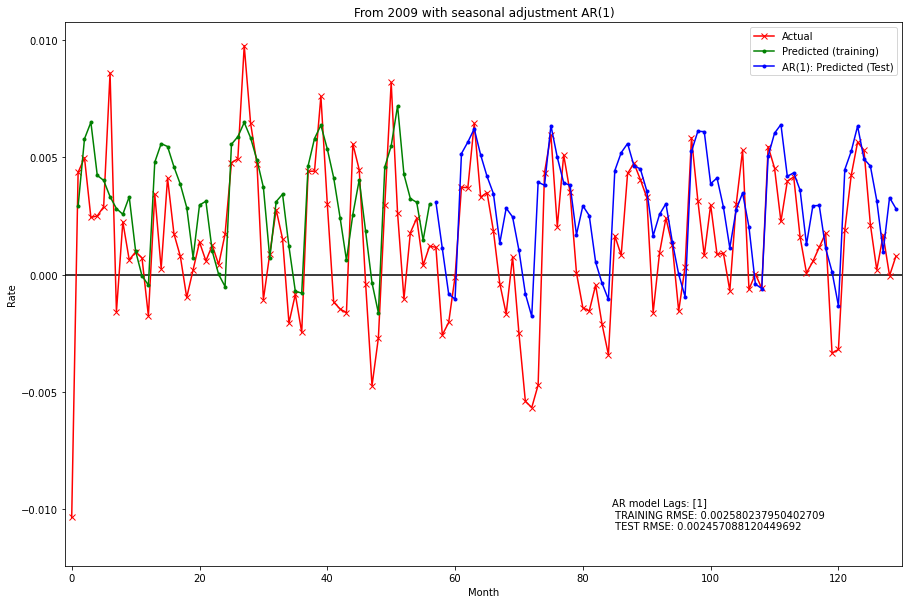

C:\Users\micha\AppData\Local\Temp/ipykernel_21560/1568845102.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi_from09['AR1_predictions'] = predictions


In [21]:
legend='AR(1)'
title = "From 2009 with seasonal adjustment AR(1)"
#ARp_train_metric(data,train_start,train_end,lag_array=[1,2],title=title,model_legend = legend)
df_data = df_cpi_from09.loc[:,['date','IRt','IRT_corrected']].reset_index(drop=True)
df_data.reset_index(drop=True)
data = df_data['IRt']
train_start = 0
train_end = len(df_data[df_data['date'] < '2013-09-01'])
predictions = ARp_train_test(data,train_start,train_end,lag_array=[1],title = title,model_legend = legend, plot=True, print_params = True)
df_cpi_from09['AR1_predictions'] = predictions

df_cpi_from09.to_csv("cpi_seasonal_ar1.csv")

Fitting on all training data:
AIC: -474.4970526978817 BIC:-466.54111651162464
const     0.001418
IRt.L1    0.395256
IRt.L2   -0.181298
dtype: float64
AR model Lags: [1, 2] 
 TRAINING RMSE: 0.0025484457882288016
 TEST RMSE: 0.002372612296285063


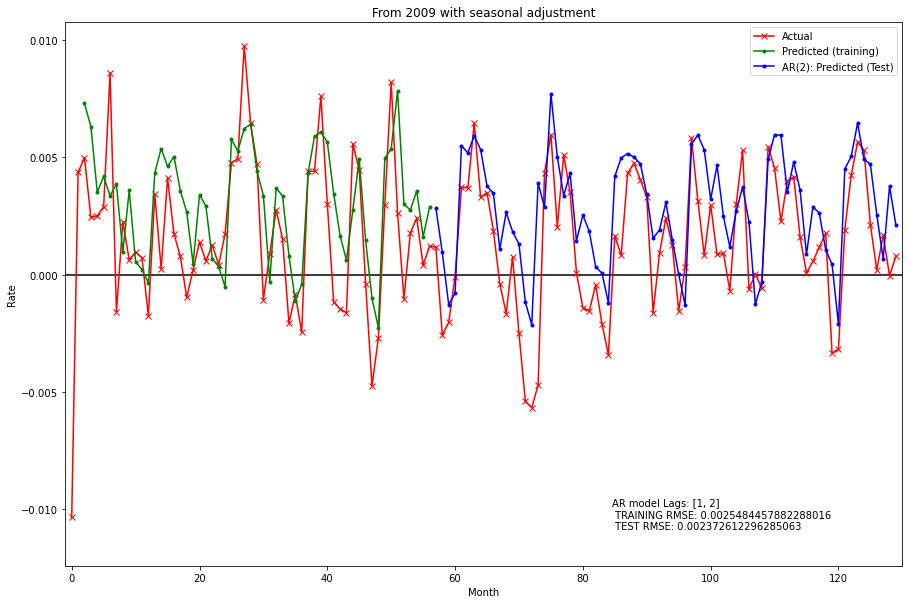

In [22]:
legend='AR(2)'
title = "From 2009 with seasonal adjustment"
df_data = df_cpi_from09.loc[:,['date','IRt','IRT_corrected']].reset_index(drop=True)
df_data.reset_index(drop=True)
data = df_data['IRt']
train_start = 0
train_end = len(df_data[df_data['date'] < '2013-09-01'])

#ARp_train_metric(data,train_start,train_end,lag_array=[1,2],title=title,model_legend = legend)
ar2_pred = ARp_train_test(data,train_start,train_end,lag_array=[1,2],title = title,model_legend = legend, plot=True, print_params = True)

Fitting on all training data:
AIC: -466.36062796146757 BIC:-456.50916839370694
const     0.001748
IRt.L1    0.339332
IRt.L2   -0.099301
IRt.L3   -0.222922
dtype: float64
AR model Lags: [1, 2, 3] 
 TRAINING RMSE: 0.0026988302736515057
 TEST RMSE: 0.0026626855512343305


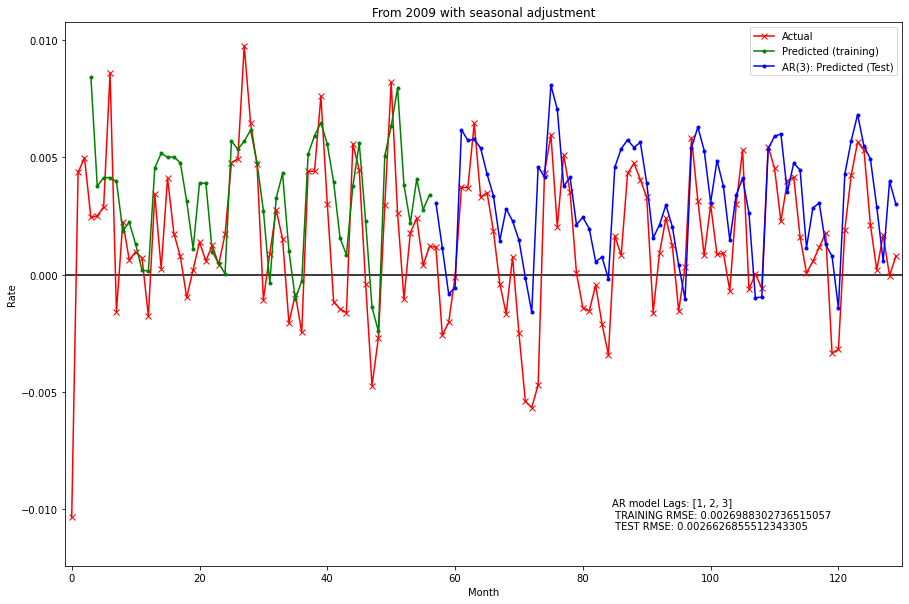

array([-2.56104830e-03,  3.06725544e-03,  3.95604193e-03,  8.41896867e-03,
        3.76221592e-03,  4.13069529e-03,  4.13012848e-03,  3.96845996e-03,
        1.86227002e-03,  2.22546426e-03,  1.29815456e-03,  1.87590494e-04,
        1.47188624e-04,  4.53807651e-03,  5.16431237e-03,  4.99599571e-03,
        5.00790488e-03,  4.75968323e-03,  3.11499217e-03,  1.10153386e-03,
        3.89312853e-03,  3.88697480e-03,  9.68360973e-04,  4.79879391e-04,
        3.15362995e-05,  5.68456339e-03,  5.33934220e-03,  5.67537501e-03,
        6.15838124e-03,  4.75105516e-03,  2.72333409e-03, -3.69064456e-04,
        3.25543493e-03,  4.30824942e-03,  9.99043441e-04, -1.04259118e-03,
       -2.77768189e-04,  5.12734881e-03,  5.91361690e-03,  6.46517269e-03,
        5.56015773e-03,  3.92301536e-03,  1.54857649e-03,  8.42529038e-04,
        3.75152355e-03,  5.59896894e-03,  2.27993966e-03, -1.39304584e-03,
       -2.42173452e-03,  5.06430465e-03,  6.31465794e-03,  7.94387899e-03,
        3.81575847e-03,  

In [23]:
legend='AR(3)'
title = "From 2009 with seasonal adjustment"
#ARp_train_metric(data,train_start,train_end,lag_array=[1,2],title=title,model_legend = legend)

df_data = df_cpi_from09.loc[:,['date','IRt','IRT_corrected']].reset_index(drop=True)
df_data.reset_index(drop=True)
data = df_data['IRt']
train_start = 0
train_end = len(df_data[df_data['date'] < '2013-09-01'])

ARp_train_test(data,train_start,train_end,lag_array=[1,2,3],title = title,model_legend = legend, plot=True, print_params = True)

In [24]:
#Conclusion use seasonality from 2009, try different lags
df_data = df_cpi_from09.loc[:,['date','IRt','IRT_corrected']].reset_index(drop=True)
#df_data.reset_index(drop=True)
data = df_data['IRT_corrected']
train_start = 0
train_end = len(df_data[df_data['date'] < '2013-09-01'])
legend='AR(3)'
title = "From 2009 seasonality"

lags = [[1],[1,2],[1,2,3], [1,2,3,4], [1,2,3,4,5], [1,2,3,4,5,6], [1,2,3,4,5,6,7], [1,2,3,4,5,6,7,8],[3], [4], [8], [3,4], [3,4,8]]
for lag_array in lags:
    ARp_train_metric(data,train_start,train_end,lag_array=lag_array,title=title,model_legend = legend, plot=False, print_params = False)

Fitting on all training data:
aAIC: -508.43549583776144 BIC:-502.41349628206405
AR model Lags: [1] 
 TRAINING RMSE: 0.0022527020796661683
Fitting on all training data:
aAIC: -498.4586507886722 BIC:-490.5027146024151
AR model Lags: [1, 2] 
 TRAINING RMSE: 0.002224172183501109
Fitting on all training data:
aAIC: -486.9693930630412 BIC:-477.11793349528057
AR model Lags: [1, 2, 3] 
 TRAINING RMSE: 0.002226489756794599
Fitting on all training data:
aAIC: -481.4227030056833 BIC:-469.71524069419473
AR model Lags: [1, 2, 3, 4] 
 TRAINING RMSE: 0.0021051099076152256
Fitting on all training data:
aAIC: -470.42999670274867 BIC:-456.9072172736784
AR model Lags: [1, 2, 3, 4, 5] 
 TRAINING RMSE: 0.0020948942035774634
Fitting on all training data:
aAIC: -464.82398407705716 BIC:-449.527800033632
AR model Lags: [1, 2, 3, 4, 5, 6] 
 TRAINING RMSE: 0.0019750168007127288
Fitting on all training data:
aAIC: -455.7174248797731 BIC:-438.69104219677746
AR model Lags: [1, 2, 3, 4, 5, 6, 7] 
 TRAINING RMSE: 0.0

Minimum RMSE and BIC tradeoff:

AIC: -12.113590458228114 BIC:-12.004099557215433
AR model Lags: [1] 
 TRAINING RMSE: 0.0022175757513622114

AIC: -12.10125695772225 BIC:-11.915380362104125
AR model Lags: [1, 2, 3] 
 TRAINING RMSE: 0.0021442442889930903

Fitting on all training data:
AIC: -12.123751225316852 BIC:-12.012225267945977
AR model Lags: [3] 
 TRAINING RMSE: 0.0022018015084198776

Fitting on all training data:
AIC: -12.247713554289986 BIC:-12.130763491108242 ******
AR model Lags: [8] 
 TRAINING RMSE: 0.0020573083492379652 *******

Fitting on all training data:
aAIC: -449.60172533130014 BIC:-443.98812229857646
const               0.000344
IRT_corrected.L8   -0.263736
dtype: float64
AR model Lags: [8] 
 TRAINING RMSE: 0.0021021601107886327


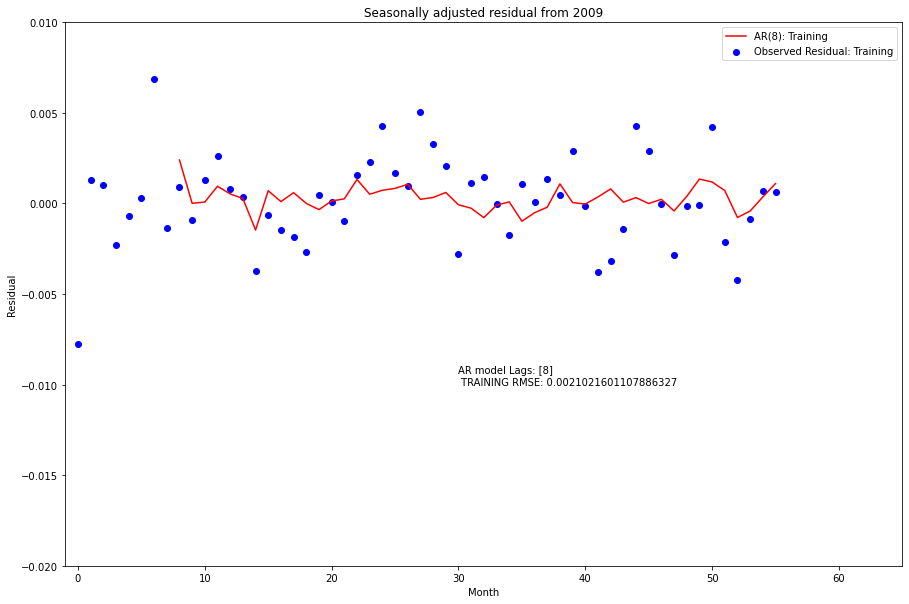

In [25]:
title ="Seasonally adjusted residual from 2009"
ARp_train_metric(data,train_start,train_end,lag_array=[8],title=title,model_legend = "AR(8)")

<b>AR(8)reduced RMSE BUT also eliminates the biggest outlier from the residual points</b>
So improved RMSE may not be valid

Fitting on all training data:
aAIC: -508.43549583776144 BIC:-502.41349628206405
const               0.000304
IRT_corrected.L1    0.165773
dtype: float64
AR model Lags: [1] 
 TRAINING RMSE: 0.0022527020796661683


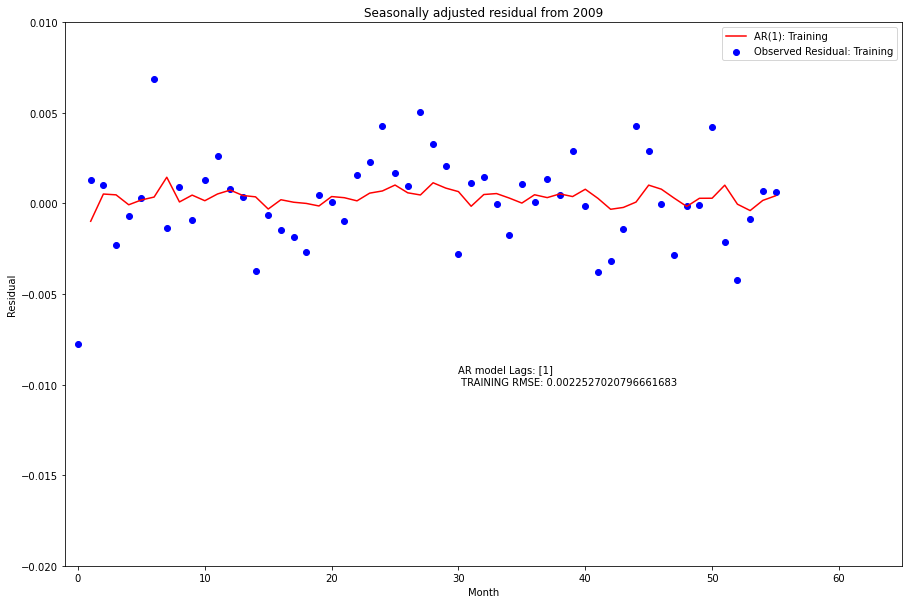

In [26]:
ARp_train_metric(data,train_start,train_end,lag_array=[1],title=title,model_legend = "AR(1)")

Fitting on all training data:
aAIC: -498.4586507886722 BIC:-490.5027146024151
const               0.000254
IRT_corrected.L1    0.255354
IRT_corrected.L2   -0.127444
dtype: float64
AR model Lags: [1, 2] 
 TRAINING RMSE: 0.002224172183501109


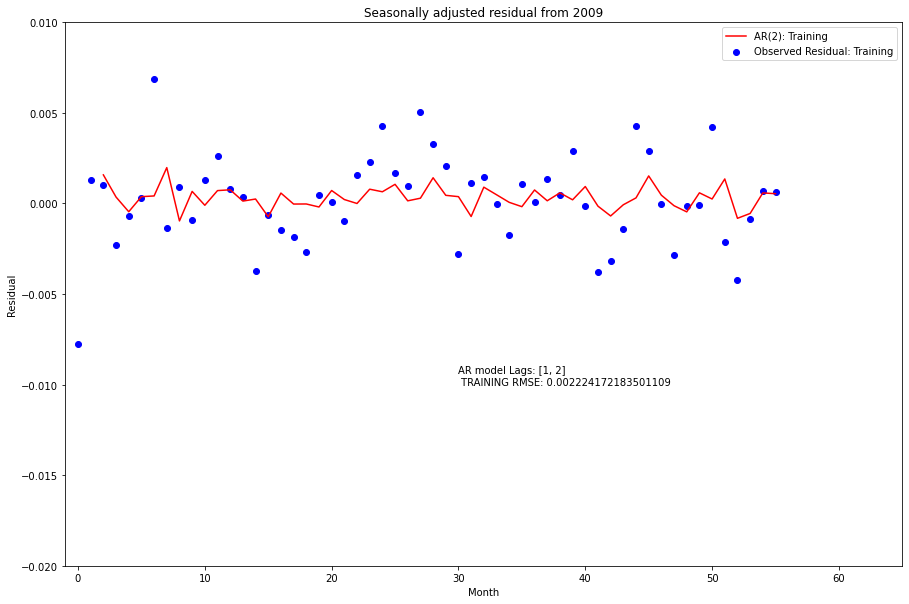

In [27]:
ARp_train_metric(data,train_start,train_end,lag_array=[1,2],title=title,model_legend = "AR(2)")

Fitting on all training data:
aAIC: -486.9693930630412 BIC:-477.11793349528057
const               0.000286
IRT_corrected.L1    0.243761
IRT_corrected.L2   -0.118103
IRT_corrected.L3   -0.109627
dtype: float64
AR model Lags: [1, 2, 3] 
 TRAINING RMSE: 0.002226489756794599


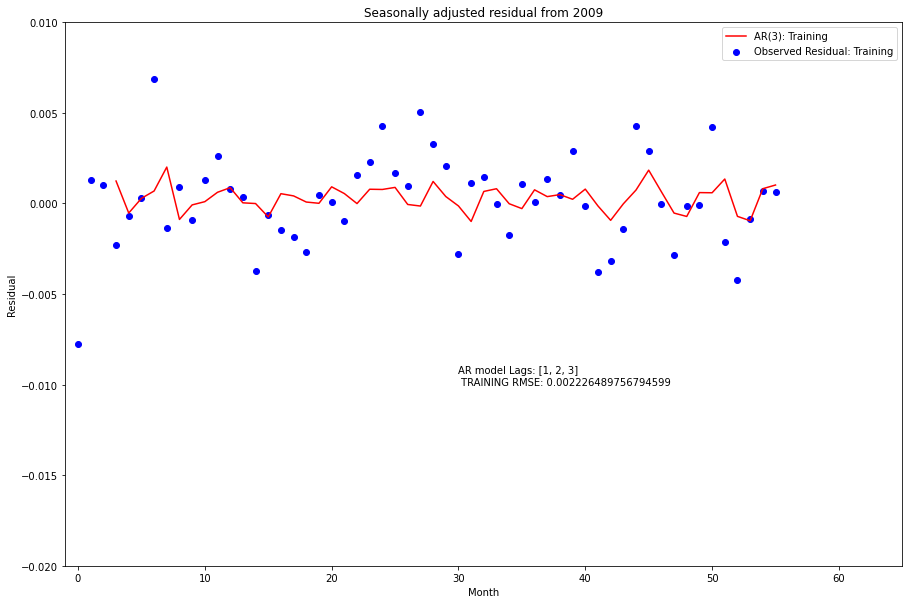

In [28]:
ARp_train_metric(data,train_start,train_end,lag_array=[1,2,3],title=title,model_legend = "AR(3)")

<b>AR1 best by AIC and BIC</b>
